Requirements
* Python
    * [Configure C++ 14 before you install POT](https://stackoverflow.com/questions/29846087/error-microsoft-visual-c-14-0-is-required-unable-to-find-vcvarsall-bat).
* Julia

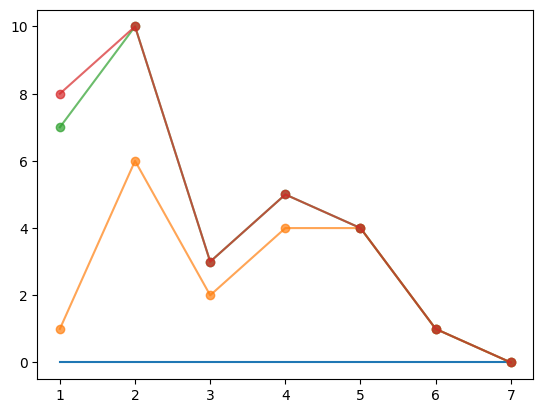

In [2]:
c = fill(Inf, (7, 7))
c[1, 2], c[1, 3], c[1, 4] = 1, 5, 3
c[2, 4], c[2, 5] = 9, 6 
c[3, 6] = 2
c[4, 6] = 4 
c[5, 7] = 4 
c[6, 7] = 1 
c[7, 7] = 0

function T(q)
    Tq = similar(q) 
    n = length(q) 
    for x in 1:n 
        Tq[x] = minimum(c[x, :] + q[:]) 
    end
    return Tq 
end

# import Pkg; Pkg.add("PyPlot")
using PyPlot 
fig, ax = plt.subplots() 
n=7 
q = zeros(n) 
ax.plot(1:n, q) 
for i in 1:3 
    new_q = T(q) 
    ax.plot(1:n, new_q, "-o", alpha=0.7) 
    q = new_q 
end
gcf()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

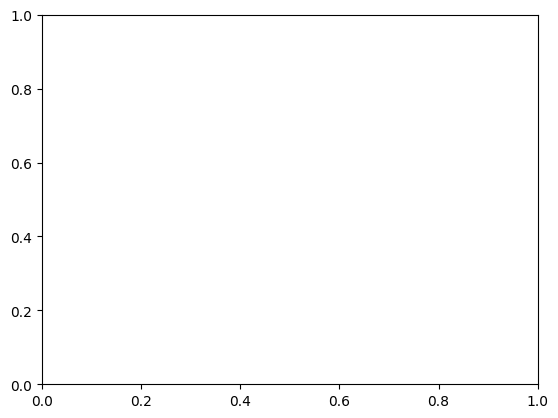

In [3]:
import networkx as nx
G = nx.florentine_families_graph()
params = nx.betweenness_centrality(G)
nx.draw_networkx(G, params)

In [4]:
A = ((2, 5), (4, 2)) 
b = (30, 20) 
c = (-3, -4)

from scipy.optimize import linprog 
result = linprog(c, A_ub=A, b_ub=b) 
print(result.x)

[2.5 5. ]


In [17]:
using JuMP 
using GLPK 

m = Model() 
set_optimizer(m, GLPK.Optimizer) 

@variable(m, q1 >= 0) 
@variable(m, q2 >= 0)
@constraint(m, 2q1 + 5q2 <= 30) 
@constraint(m, 4q1 + 2q2 <= 20) 
@objective(m, Max, 3q1 + 4q2) 

optimize!(m)
value.(q1)
value.(q2)

5.0

In [2]:
import numpy as np
from scipy.optimize import linprog

import numpy as np
from scipy.optimize import linprog
def ot_solver(phi, psi, c, method='highs-ipm'):
    n, m = len(phi), len(psi)
    c_vec = c.reshape((m * n, 1), order='F')
    A1 = np.kron(np.ones((1, m)), np.identity(n))
    A2 = np.kron(np.identity(m), np.ones((1, n)))
    A = np.vstack((A1, A2))
    b = np.hstack((phi, psi))
    res = linprog(c_vec, A_eq=A, b_eq=b, method=method)
    pi = res.x.reshape((n, m), order='F')
    return pi

phi = np.array((0.5, 0.5)) 
psi = np.array((1, 0)) 
c = np.ones((2, 2))

ot_solver(phi, psi, c)

array([[ 0.5, -0. ],
       [ 0.5,  0. ]])

In [ ]:
import ot
ot.emd(phi, psi, c)